In [591]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [592]:
# with catagory Low=1, medium=2 and High=3
R_wine = pd.read_csv(r'c:\Data Analysis\Wine Dataset\winequality-red.csv', sep= ';') 
W_wine = pd.read_csv(r'c:\Data Analysis\Wine Dataset\winequality-white.csv', sep= ';')

# R_wine['wine_type'] = 0
# W_wine['wine_type'] = 1

R_wine ['quality label'] = pd.cut(R_wine['quality'],bins=[0,5,7,10],labels=[0,1,2],right=True)

W_wine ['quality label'] = pd.cut(W_wine['quality'],bins=[0,5,7,10],labels=[0,1,2],right=True)


R_wine['quality label'] = R_wine['quality label'].cat.codes
W_wine['quality label'] = W_wine['quality label'].cat.codes

RW_wine = pd.concat ((R_wine,W_wine), ignore_index=True)
RW_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  quality label         6497 non-null   int8   
dtypes: float64(11), int64(1), int8(1)
memory usage: 615.6 KB


In [593]:
R_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


Text(0.5, 1.0, 'Count of White Wine')

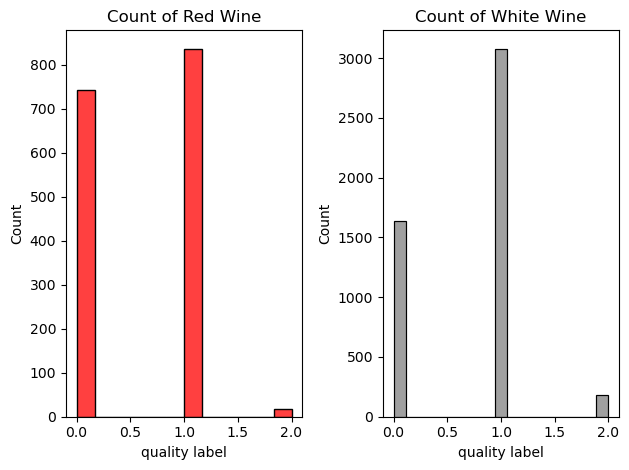

In [594]:
plt.subplot(1,2,1)
sns.histplot(data=R_wine, x='quality label', color='red')
#plt. ylim (0,3500)
plt.title ('Count of Red Wine')
#plt.suptitle("red", x=0.60, y=1.0)
plt.subplot(1,2,2)
sns.histplot(data=W_wine, x='quality label', color='gray')
#plt. ylim (0,3500)
#plt.suptitle("white", x=0.30, y=1.0)
plt.tight_layout()
plt.title ('Count of White Wine')

In [595]:
#R_wine = R_wine.drop(['quality', 'fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','sulphates'], axis=1) #0.7 - 0.74 -- 67.93 --75
#R_wine = R_wine.drop(['quality', 'free sulfur dioxide', 'total sulfur dioxide','sulphates'], axis=1) ## 71.87 --78.12 // 70.20 --79.79
#R_wine = R_wine.drop(['quality', 'free sulfur dioxide', 'total sulfur dioxide'], axis=1) ## 70.93 -- 77.81 / 71.04 -- 78.75
R_wine = R_wine.drop(['quality', 'free sulfur dioxide'], axis=1) ## 72.81 -- 79.68 // 71.66 --80.20
#R_wine = R_wine.drop(['quality'], axis=1)  ## 72.18 -- 77.18 // 71.45--80.41

#RW_wine_N.info()
R_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   total sulfur dioxide  1599 non-null   float64
 6   density               1599 non-null   float64
 7   pH                    1599 non-null   float64
 8   sulphates             1599 non-null   float64
 9   alcohol               1599 non-null   float64
 10  quality label         1599 non-null   int8   
dtypes: float64(10), int8(1)
memory usage: 126.6 KB


<Axes: >

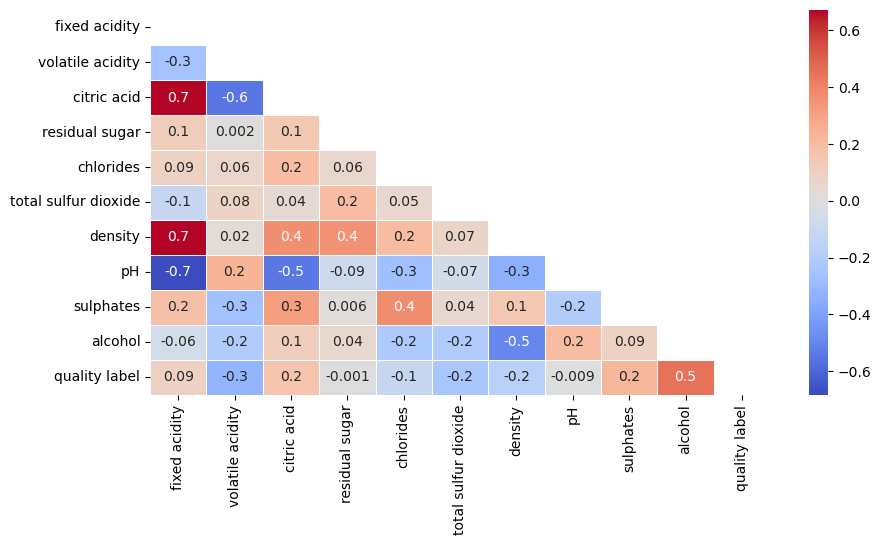

In [596]:
plt.figure(figsize=(10,5), dpi=100)
R_matrix = np.triu(R_wine.corr(numeric_only=True))
sns.heatmap(R_wine.corr(numeric_only=True), mask= R_matrix, cmap='coolwarm',fmt='.1g', annot=True, linewidths=0.5)

In [597]:
# logistic Regression

from sklearn.model_selection import train_test_split

X = R_wine.drop('quality label', axis=1)
y = R_wine['quality label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(random_state=42, max_iter=10000) ## Logistic Regression model
LR_model.fit(X_train,y_train)

Predic = LR_model.predict(X_test)

from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,Predic)
print ("liner reg report for red wine is", acc)

from sklearn.metrics import classification_report
print (classification_report(y_test,Predic))

liner reg report for red wine is 0.7166666666666667
              precision    recall  f1-score   support

           0       0.68      0.75      0.71       213
           1       0.76      0.70      0.73       261
           2       0.00      0.00      0.00         6

    accuracy                           0.72       480
   macro avg       0.48      0.49      0.48       480
weighted avg       0.71      0.72      0.71       480



c:\Users\Karan\anaconda3\envs\threeten\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Karan\anaconda3\envs\threeten\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Karan\anaconda3\envs\threeten\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

In [598]:
## Random Forest Classifier model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#RF_clf = RandomForestClassifier(criterion='entropy',random_state=453,bootstrap= True, max_depth= 10, min_samples_leaf= 1,min_samples_split= 2, n_estimators= 300) ## random stae is set for 1 model everytime same.
RF_clf = RandomForestClassifier(n_estimators=300,criterion='entropy',random_state=453)
RF_clf.fit(X_train,y_train)
Predic = RF_clf.predict(X_test)
acc = accuracy_score(y_test, Predic)
print ("Randomforest report for red wine is", acc)
from sklearn.metrics import classification_report
print (classification_report(y_test,Predic))

Randomforest report for red wine is 0.8020833333333334
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       213
           1       0.81      0.84      0.82       261
           2       0.50      0.17      0.25         6

    accuracy                           0.80       480
   macro avg       0.70      0.59      0.62       480
weighted avg       0.80      0.80      0.80       480



In [599]:
from sklearn.metrics import confusion_matrix

confusion_matrix (y_test,Predic)

array([[165,  48,   0],
       [ 41, 219,   1],
       [  0,   5,   1]])

In [600]:
# # # Creating a Parameter Grid for Hyperparameter Tuning in Random Forest. 
# # In the first step of hyperparameter tuning there will be created a parameter grid to define the hyperparameters that are used to tune the Logistic Regression model performance.
# from sklearn.model_selection import GridSearchCV, StratifiedKFold
# param_grid_Red = {
#     'n_estimators': [100, 200, 300, 500],         # Number of trees
#     'max_depth': [None, 10, 20, 30],         # Max depth of trees
#     'min_samples_split': [2, 5],             # Min samples to split a node
#     'min_samples_leaf': [1, 2],              # Min samples at a leaf node        # Features to consider per split
#     'bootstrap': [True, False]               # Use bootstrap samples
# }
# RF_clf = RandomForestClassifier(random_state=101)
# stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Grid_search_R = GridSearchCV(RF_clf,param_grid = param_grid_Red, cv = stratified_kfold,  verbose=True,n_jobs=-1, scoring='accuracy')


# Grid_search_R.fit(X_train, y_train)
# best_Param = Grid_search_R.best_params_
# print (best_Param, Grid_search_R.best_score_)

Text(70.72222222222221, 0.5, 'Actual Values')

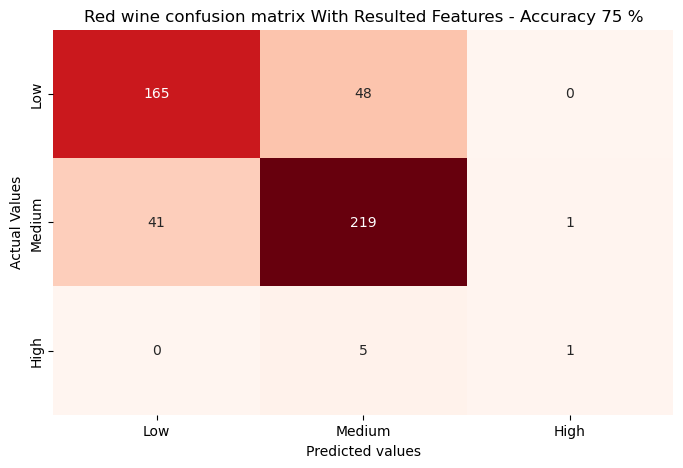

In [601]:
# Red wine confusion matrix
cm = confusion_matrix (y_test,Predic)
cm_df = pd.DataFrame (cm, index= ['Low','Medium','High'],columns=['Low','Medium','High'])
plt.figure(figsize=(8,5))
sns.heatmap(cm_df,annot=True,cbar=False,cmap='Reds',fmt='d')
plt.title ('Red wine confusion matrix With Resulted Features - Accuracy 75 %')
plt.xlabel ('Predicted values')
plt.ylabel ('Actual Values')


In [602]:
## Normalisation of data. it need tobe done after split ##

from sklearn.model_selection import train_test_split

X = R_wine.drop('quality label', axis=1)
y = R_wine['quality label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler ()
scaler.fit(X_train)
X_train_Scaled = scaler.transform(X_train)
X_test_Scaled = scaler.transform(X_test)

#now Check liner regression again

from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(random_state=42)
LR_model.fit(X_train_Scaled,y_train)
Predic = LR_model.predict(X_test_Scaled)

from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,Predic)
print ("liner reg is", acc)

## RandomForest

from sklearn.ensemble import RandomForestClassifier

RF_clf = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=453)
RF_clf.fit(X_train_Scaled,y_train)
Predic = RF_clf.predict(X_test_Scaled)

from sklearn.metrics import accuracy_score

acc_r = accuracy_score(y_test, Predic)
print ("Random forest acc is", acc_r)

liner reg is 0.7020833333333333
Random forest acc is 0.7958333333333333


Text(70.72222222222221, 0.5, 'Actual Values')

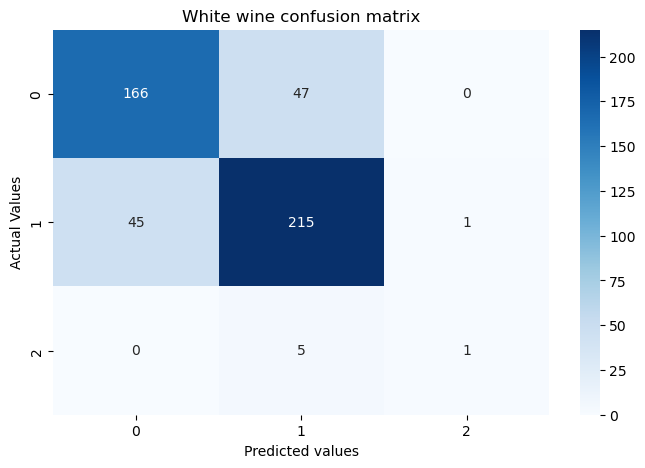

In [603]:
## Confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix (y_test,Predic)

# Red wine confusion matrix
cm = confusion_matrix (y_test,Predic)
cm_df = pd.DataFrame (cm, index= [0,1,2],columns=[0,1,2])
plt.figure(figsize=(8,5))
sns.heatmap(cm_df,annot=True,cbar=True,cmap='Blues',fmt='d')
plt.title ('White wine confusion matrix')
plt.xlabel ('Predicted values')
plt.ylabel ('Actual Values')

In [604]:
W_wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality label
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,1


In [605]:
## White wine analysis

#W_wine = W_wine.drop(['quality', 'fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH','sulphates'], axis=1) #0.66 - 0.7693
#W_wine = W_wine.drop(['quality', 'citric acid', 'pH','sulphates'], axis=1) ## 0.7 --0.8163
#W_wine = W_wine.drop(['quality', 'pH','sulphates'], axis=1) ## 0.7 --82.14
#W_wine = W_wine.drop(['quality','sulphates'], axis=1) ## 70 -- 82.24
W_wine = W_wine.drop(['quality'], axis=1)  ## 70.81 -- 82.44
W_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality label         4898 non-null   int8   
dtypes: float64(11), int8(1)
memory usage: 425.8 KB


<Axes: >

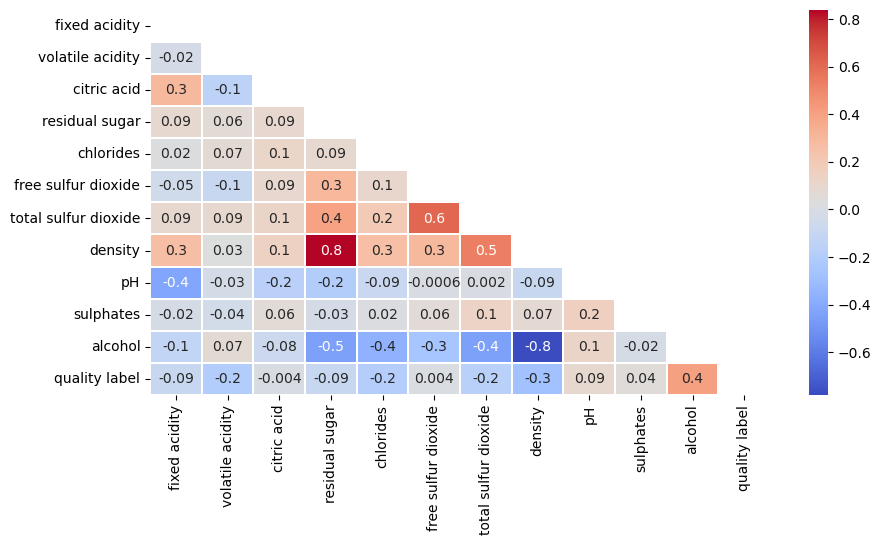

In [606]:
plt.figure(figsize=(10,5), dpi=100)
W_matrix = np.triu(W_wine.corr(numeric_only=True))
sns.heatmap(W_wine.corr(numeric_only=True), mask= W_matrix, cmap='coolwarm',fmt='.1g', annot=True, linewidths=0.3)

In [607]:
from sklearn.model_selection import train_test_split

X = W_wine.drop('quality label', axis=1)
y = W_wine['quality label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#now Check liner regression again

from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(random_state=42, max_iter=10000) ## Logistic Regression model
LR_model.fit(X_train,y_train)

Predic = LR_model.predict(X_test)

from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,Predic)
print ("liner reg report for White wine is", acc)

from sklearn.metrics import classification_report
print (classification_report(y_test,Predic))

liner reg report for White wine is 0.7081632653061225
              precision    recall  f1-score   support

           0       0.64      0.50      0.56       321
           1       0.73      0.86      0.79       624
           2       0.00      0.00      0.00        35

    accuracy                           0.71       980
   macro avg       0.46      0.45      0.45       980
weighted avg       0.68      0.71      0.69       980



c:\Users\Karan\anaconda3\envs\threeten\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [608]:
## Random Forest Classifier model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

RF_clf = RandomForestClassifier(n_estimators=300,criterion='entropy',random_state=453) ## random stae is set for 1 model everytime same.
#RF_clf = RandomForestClassifier(criterion='entropy',random_state=453, bootstrap = True, max_depth = 20, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 500)
RF_clf.fit(X_train,y_train)
Predic = RF_clf.predict(X_test)
acc = accuracy_score(y_test, Predic)
print ("Randomforest report for White wine is", acc)
from sklearn.metrics import classification_report
print (classification_report(y_test,Predic))

Randomforest report for White wine is 0.8244897959183674
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       321
           1       0.84      0.90      0.87       624
           2       1.00      0.43      0.60        35

    accuracy                           0.82       980
   macro avg       0.88      0.68      0.74       980
weighted avg       0.83      0.82      0.82       980



In [609]:
# # # Creating a Parameter Grid for Hyperparameter Tuning in Random Forest. 
# # In the first step of hyperparameter tuning there will be created a parameter grid to define the hyperparameters that are used to tune the Logistic Regression model performance.
# from sklearn.model_selection import GridSearchCV, StratifiedKFold
# param_grid_Red = {
#     'n_estimators': [100, 200, 300, 500],         # Number of trees
#     'max_depth': [None, 10, 20, 30],         # Max depth of trees
#     'min_samples_split': [2, 5],             # Min samples to split a node
#     'min_samples_leaf': [1, 2],              # Min samples at a leaf node        # Features to consider per split
#     'bootstrap': [True, False]               # Use bootstrap samples
# }
# RF_clf = RandomForestClassifier(random_state=101)
# stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Grid_search_R = GridSearchCV(RF_clf,param_grid = param_grid_Red, cv = stratified_kfold,  verbose=True,n_jobs=-1, scoring='accuracy')


# Grid_search_R.fit(X_train, y_train)
# best_Param = Grid_search_R.best_params_
# print (best_Param, Grid_search_R.best_score_)

Text(70.72222222222221, 0.5, 'Actual Values')

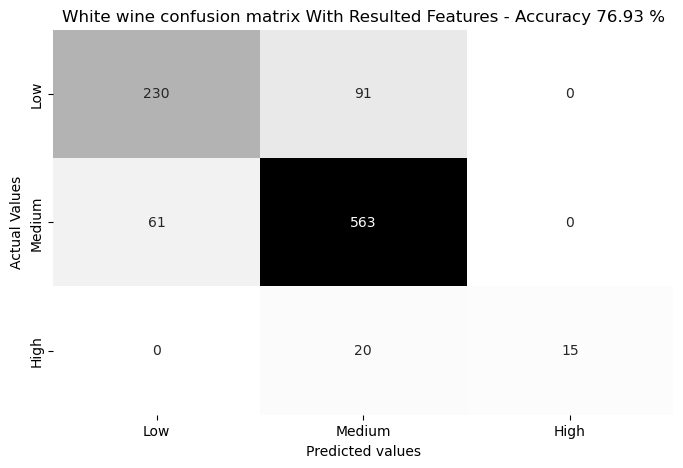

In [610]:
## Confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix (y_test,Predic)

# Red wine confusion matrix
cm = confusion_matrix (y_test,Predic)
cm_df = pd.DataFrame (cm, index= ['Low','Medium','High'],columns=['Low','Medium','High'])
plt.figure(figsize=(8,5))
sns.heatmap(cm_df,annot=True,cbar=False,cmap='Grays',fmt='d')
plt.title ('White wine confusion matrix With Resulted Features - Accuracy 76.93 %')
plt.xlabel ('Predicted values')
plt.ylabel ('Actual Values')

In [611]:
## Normalisation of data. it need tobe done after split ##

from sklearn.model_selection import train_test_split

X = W_wine.drop('quality label', axis=1)
y = W_wine['quality label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler ()
scaler.fit(X_train)
X_train_Scaled = scaler.transform(X_train)
X_test_Scaled = scaler.transform(X_test)

#now Check liner regression again

from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(random_state=42)
LR_model.fit(X_train_Scaled,y_train)
Predic = LR_model.predict(X_test_Scaled)

from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,Predic)
print ("liner reg is", acc)

## RandomForest

from sklearn.ensemble import RandomForestClassifier

RF_clf = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=453)
RF_clf.fit(X_train_Scaled,y_train)
Predic = RF_clf.predict(X_test_Scaled)

from sklearn.metrics import accuracy_score

acc_r = accuracy_score(y_test, Predic)
print ("Random forest acc is", acc_r)

liner reg is 0.7051020408163265
Random forest acc is 0.826530612244898


Text(70.72222222222221, 0.5, 'Actual Values')

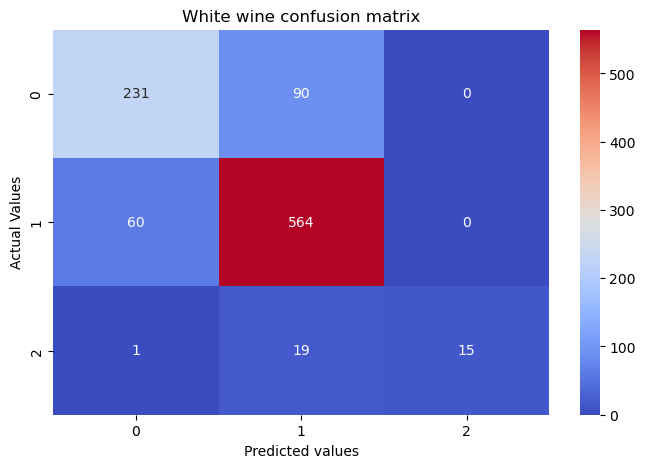

In [612]:
## Confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix (y_test,Predic)

# Red wine confusion matrix
cm = confusion_matrix (y_test,Predic)
cm_df = pd.DataFrame (cm, index= [0,1,2],columns=[0,1,2])
plt.figure(figsize=(8,5))
sns.heatmap(cm_df,annot=True,cbar=True,cmap='coolwarm',fmt='d')
plt.title ('White wine confusion matrix')
plt.xlabel ('Predicted values')
plt.ylabel ('Actual Values')

In [613]:
#sns.pairplot(data=W_wine, hue='quality label',palette='coolwarm')